# Evomo Power Smart Detection Model
Bangkit Company Capstone Project [C242-PS01]

## Team Members
- M011B4KY1007 - Darren Christian Liharja
- C002B4KY2028 - Ivanoel Rhema Christama Adhiprama
- C002B4KY3771 - Reyhan Ghifari Tanjung
- A001B4KY2884 - Muhammad Haris Sabil Al Karim
- A318B4KX1511 - Fina Febrianti

## Problem Statements
Excessive energy consumption due to inefficient usage leads to increased costs and negative impacts on the environment Currently, energy inefficiencies and unusual usage patterns often go undetected, resulting in wasted resources. This project aims to develop an application that can monitor and detect energy usage patterns, provide real-time energy consumption information, and identify anomalies in energy usage. The application will also send notifications when anomalies occur, helping facility managers reduce energy waste and improve efficiency.

## Machine Learning Path Solution
Develop an anomaly detection model to identify spikes in energy consumption, enabling building managers to detect and address potential issues effectively.

## Data Source
Data are provided by Evomo

## Data Exploration and Cleaning

### Importing Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Extracting Data from Excel
The provided data are in the form of xlsx

In [2]:
df = pd.read_excel('data/Historical Data.xlsx', skiprows=1)
df

,Time,Data
0,26 Oct 2024 06:09:34,"{counter: 1,data: ""{""meter_type"":""mk10m"",""data..."
1,26 Oct 2024 06:07:45,"{data: ""{""meter_type"":""mk10m"",""data_type"":""ins..."
2,25 Oct 2024 13:59:39,"{counter: 48,data: ""{""meter_type"":""mk10m"",""dat..."
3,25 Oct 2024 13:39:30,"{counter: 46,data: ""{""meter_type"":""mk10m"",""dat..."
4,25 Oct 2024 13:29:34,"{counter: 45,data: ""{""meter_type"":""mk10m"",""dat..."
...,...,...
27407,01 Jan 2024 08:10:06,"{counter: 9,data: ""{""meter_type"":""mk10m"",""data..."
27408,01 Jan 2024 08:00:15,"{counter: 8,data: ""{""meter_type"":""mk10m"",""data..."
27409,01 Jan 2024 07:50:16,"{counter: 7,data: ""{""meter_type"":""mk10m"",""data..."
27410,01 Jan 2024 07:30:18,"{counter: 5,data: ""{""meter_type"":""mk10m"",""data..."


### Data Explanation
The dataset consists of two columns:
- Time: Contains timestamps which indicates when the data was collected.
- Data: Contains energy usage information for specific areas.

In [3]:
# A sample data from "data" column
sample = {
    "counter": 1,
    "data": {
        "meter_type": "mk10m",
        "data_type": "instant data",
        "reading_time": "2024-10-26 06:10:03",
        "meter_serial_number": "251400321",
        "active_energy_import": 49927072,
        "active_energy_export": 0,
        "reactive_energy_import": 82461,
        "reactive_energy_export": 27877274,
        "apparent_energy_import": 105524051,
        "apparent_energy_export": 0,
        "instantaneous_volatage_L1": 228.217,
        "instantaneous_volatage_L2": 228.282,
        "instantaneous_volatage_L3": 230.126,
        "instantaneous_current_L1": 0.387,
        "instantaneous_current_L2": 0.403,
        "instantaneous_current_L3": 0.41400000000000003,
        "instantaneous_net_frequency": 49.97,
        "instantaneous_power_factor": 0.08979999999999999,
        "create_date": "2024-10-26 06:10:06",
        "raw": "0f80000000000212167016c806671c254b0a09323531343030333231150000000002f9d3a015000000000000000015000000000001421d150000000001a95f9a1500000000064a2b531500000000000000000600037b790600037bba06000382ee06000001830600000193060000019e1213850500000382"
    },
    "devEui": "123494e68681e40c",
    "port": 11,
    "radio": {
        "modulation": {
        "bandwidth": 125000,
        "type": "LORA",
        "spreading": 8,
        "coderate": "4/5"
        },
        "hardware": {
        "status": 1,
        "chain": 0,
        "tmst": 0,
        "snr": 1,
        "rssi": -114,
        "channel": 0,
        "gps": {
            "lat": -6.237232685089111,
            "lng": 106.79916381835938,
            "alt": 12
        }
        },
        "freq": 921.8,
        "datarate": 4,
        "time": 1729897774.8805263
    },
    "type": "uplink"
}

Explanation of Electrical Concepts
- active_energy_import: The total active energy imported into the system, measured in kilowatt-hours (kWh). This represents the actual energy consumed.
- active_energy_export: The total active energy exported from the system, measured in kilowatt-hours (kWh). This occurs when excess energy is sent back to the grid.
- reactive_energy_import: The cumulative reactive energy imported into the system, measured in kilovolt-ampere reactive hours (kVarh). Reactive energy supports the magnetic and electric fields in devices like transformers and motors.
- reactive_energy_export: The cumulative reactive energy exported from the system, measured in kilovolt-ampere reactive hours (kVarh).
- apparent_energy_import: The total apparent energy imported into the system, measured in kilovolt-ampere hours (kVAh). Apparent energy is the vector sum of active and reactive energy.
- apparent_energy_export: The total apparent energy exported from the system, measured in kilovolt-ampere hours (kVAh).
- instantaneous_voltage_L1, L2, L3: The real-time voltage levels across each phase of the three-phase power system, e.g., 228.217 V for phase L1.
- instantaneous_current_L1, L2, L3: The real-time current levels flowing through each phase of the three-phase power system, e.g., 0.387 A for phase L1.
- instantaneous_net_frequency: The real-time frequency of the electrical network, measured in hertz (Hz), e.g., 49.97 Hz, which indicates the stability of the power supply.

The image below could also help understand the concept between active, reactive, and apparent energy

<img src="images/power.jpg" alt="Energy Type" style="width: 600px;"/>

### Advisor Suggestions
- Focus on "active_energy_import", which represents actual electricity consumption. Since this data is cumulative, calculate the energy usage by subtracting the value at time A from the value at time B.
- Use the data from February to August, as it offers the highest data quality.

### Extracting Important Data
The "data_type" feature is also included to account for potential differences in active_energy_import readings across different data types.

In [4]:
def extract_active_energy(data_str):
    match = re.search(r'"active_energy_import":\s*(\d+)', data_str)
    if match:
        return int(match.group(1))
    return None

def extract_data_type(data_str):
    match = re.search(r'"data_type":\s*"(.*?)"', data_str)
    if match:
        return match.group(1)
    return None

In [5]:
df['active energy import'] = df['Data'].apply(extract_active_energy)
df['data type'] = df['Data'].apply(extract_data_type)

Dropping the "Data" column to remove unnecessary features.

In [6]:
df = df.drop('Data', axis=1)

converting "Time" column to dataframe index and datetime format for easier preprocessing

In [7]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

In [8]:
df.head()

,active energy import,data type
Time,,
2024-10-26 06:09:34,49927072,instant data
2024-10-26 06:07:45,49927064,instant data
2024-10-25 13:59:39,49873262,instant data
2024-10-25 13:39:30,49867253,instant data
2024-10-25 13:29:34,49864248,instant data


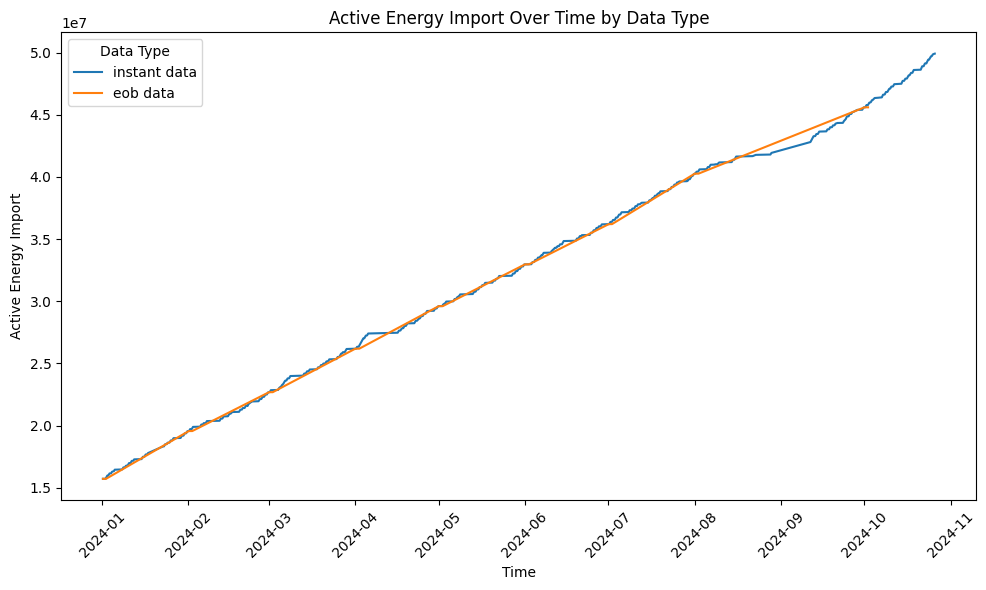

In [9]:
plt.figure(figsize=(10, 6))
for data_type in df['data type'].unique():
    subset = df[df['data type'] == data_type]
    plt.plot(subset.index, subset['active energy import'], label=data_type)

plt.title('Active Energy Import Over Time by Data Type')
plt.xlabel('Time')
plt.ylabel('Active Energy Import')
plt.legend(title='Data Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
eob_count = (df['data type'] == 'eob data').sum()
print(eob_count)

77


From the plot above, there are 2 data types
- instant data
- eob data
Since eob data accounts for a very small percentage of the data. I decided to drop the eob data type completely to remove variance in the data

### Removing Eob Data Type

In [11]:
df.drop(df[df['data type'] == 'eob data'].index, inplace=True)

## Creating New Data Frame
To simplify the modeling process, a new dataframe will be created containing the features that will help identify energy usage anomalies.

Changing the timestamps to a consistent hourly rate instead of per polling allows for resampling the dataframe and calculating the average of "active energy import" over each hour.

In [12]:
def hourly_mean(df):
    df_hourly = []
    for hour, group in df.resample('h'):
        mean_value = group['active energy import'].mean()
        df_hourly.append((hour, mean_value))
    
    return pd.DataFrame(df_hourly, columns=['timestamp', 'hourly average'])

In [13]:
df_hourly = hourly_mean(df)

Checking on nan values which indicates there is no data on specific hours

In [14]:
nan_count = df_hourly['hourly average'].isna().sum()
print(nan_count)

1220


In [15]:
df_hourly = df_hourly.dropna(subset=['hourly average'])

### Filtering Timestamps (February to August)
Following the suggestions from company advisor. Only data from February to August will be taken

In [16]:
def filter_february_to_august(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    filtered_df = df[(df['timestamp'].dt.month >= 2) & (df['timestamp'].dt.month <= 8)]
    
    return filtered_df

In [17]:
df_hourly = filter_february_to_august(df_hourly)

### Calculate Usage
To calculate the energy usage, we would need the difference between time A and time B

Points to consider
-  there are missing values in the timestamp which might result in unexpectedly large usage

To combat this problem the one of the solution is to use the formula 
usage = (active energy import[i] - active energy import[i-1])/difference in hour

In [18]:
def calculate_usage(df):
    df['usage'] = (df['hourly average'].diff() / (df['timestamp'].diff().dt.total_seconds() / 3600)) / 1000 # divided by 1000 to convert it to KwH
    df['usage'].iloc[0] = 0 

    return df

In [19]:
df_hourly = calculate_usage(df_hourly)

C:\Users\62813\AppData\Local\Temp\ipykernel_38696\3859636708.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['usage'].iloc[0] = 0
C:\Users\62813\AppData\Local\Temp\ipykernel_38696\3859636708.py:3: SettingWithCopyWarning: 
A value is t

### Adding Features
Set the timestamp as the index and add "hour" and "day of the week" features to enhance the dataset for modeling purposes. These new features can help capture temporal patterns in energy usage.

In [20]:
df_hourly.set_index('timestamp', inplace=True)
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day_of_week'] = df_hourly.index.dayofweek

In [21]:
df_hourly.head

<bound method NDFrame.head of                      hourly average      usage  hour  day_of_week
timestamp                                                        
2024-02-01 00:00:00    1.955991e+07   0.000000     0            3
2024-02-01 01:00:00    1.956011e+07   0.199500     1            3
2024-02-01 02:00:00    1.956033e+07   0.220500     2            3
2024-02-01 03:00:00    1.956056e+07   0.225000     3            3
2024-02-01 04:00:00    1.956076e+07   0.204500     4            3
...                             ...        ...   ...          ...
2024-08-28 09:00:00    4.186957e+07  13.110667     9            2
2024-08-28 10:00:00    4.189131e+07  21.741000    10            2
2024-08-28 11:00:00    4.190912e+07  17.805583    11            2
2024-08-28 12:00:00    4.192575e+07  16.629350    12            2
2024-08-28 13:00:00    4.194027e+07  14.523650    13            2

[4477 rows x 4 columns]>

## Modelling
For this model architecture, we will use autoencoder to detect anomalies in energy usage. Autoencoders are a type of neural network used for unsupervised learning and are particularly effective for anomaly detection tasks. They learn to compress (encode) input data into a lower-dimensional representation and then reconstruct (decode) the input data from this compressed representation.

### How Autoencoder Works for Anomaly Detection
An autoencoder consists of two main parts:
- Encoder: This part of the network learns to compress the input data into a lower-dimensional representation or latent space. Essentially, the encoder extracts the most important features of the input.
- Decoder: The decoder attempts to reconstruct the input data from the compressed latent representation. It tries to bring the data back to its original form.

<img src="images/autoencoder.png" alt="Autoencoder" style="width: 600px;"/>

During training, the model is trained to minimize the reconstruction error. The difference between the input data and its reconstructed version. The model learns to reconstruct well the "normal" or expected patterns in the data. However, when the model encounters an anomaly (data that is significantly different from the normal patterns it has learned), the reconstruction error will be larger.

### How LSTM Works
LSTM is specifically designed to solve the vanishing gradient problem of traditional RNNs. It can capture both short-term dependencies (recent data points) and long-term dependencies (older but still relevant data points) in sequences. This is achieved through its unique architecture, which includes three key components:
- Input Gate: Controls how much of the current input to allow into the memory cell.
- Forget Gate: Decides which information from the past should be forgotten or retained.
- Output Gate: Determines how much of the memory cell to pass on as output.

<img src="images/LSTM.jpg" alt="LSTM" style="width: 600px;"/>

### Why Use LSTM for Anomaly Detection?
Energy usage data often follows cyclical or repetitive patterns, such as daily or weekly usage cycles. LSTMs are ideal for capturing these temporal dependencies and detecting deviations from the learned patterns. For anomaly detection, LSTM models predict future energy usage based on past data. Large deviations between predicted and actual values can indicate anomalies.


### Combining Both
To effectively capture both the temporal dependencies in energy usage data and detect anomalies, we use an LSTM Autoencoder. This combines the sequential learning capabilities of LSTMs with the dimensionality reduction and reconstruction features of autoencoders. Here's how the combined architecture works:

- Encoder: The input sequence of energy usage data (e.g., hourly or daily averages) is passed through LSTM layers in the encoder. These layers compress the input sequence into a latent space representation. The LSTM encoder captures patterns and temporal relationships in the data.
- Latent Space: The encoder reduces the input data into a lower-dimensional representation that retains only the most critical information, discarding noise and redundant features.
- Decoder: The latent representation is passed to the LSTM decoder, which attempts to reconstruct the input sequence. This step uses the compressed representation to recreate the original energy usage pattern.
- Reconstruction Error: The reconstructed sequence is compared to the original input sequence, and the difference is calculated as the reconstruction error.
For normal data, the error is low because the model has learned the regular patterns. For anomalies, the reconstruction error is significantly higher, as the model cannot effectively recreate these unseen patterns.

Source (https://doi.org/10.1016/j.ijinfomgt.2020.102282)

<img src="images/LSTM Autoencoder.jpg" alt="LSTM" style="width: 600px;"/>

### Importing Libraries

In [22]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

Fitur yang akan digunakan
- usage
- hour
- day_of_week

In [23]:
data = df_hourly[['usage', 'hour', 'day_of_week']]

To accommodate the LSTM network, we need to create sequences of data. In this case, I am using a sequence size of 23 inputs, where the 24th data point is chosen as the target Y. The choice of 24 inputs corresponds to the 24 polling times in a day, allowing the model to learn patterns from the preceding 24 observations to predict the next one.

In [24]:
def create_sequences(data, seq_size):
    sequences = []
    for i in range(len(data) - seq_size):
        sequences.append(data[i:i + seq_size])
    return np.array(sequences)

Performs normalization on the data because LSTM use sigmoid and tanh which are sensitive to the value

In [25]:
scaler = StandardScaler()
def scale_data(data):
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [26]:
scaled_data = scale_data(data)

In [27]:
seq_size = 24
X = create_sequences(scaled_data, seq_size)

In [28]:
data.shape

(4477, 3)

In [29]:
X.shape

(4453, 24, 3)

Splitting the data into 80% for training and 20% for testing

In [30]:
train_size = int(0.8 * len(X))
trainX, testX = X[:train_size], X[train_size:]

### Model Architecture

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(trainX.shape[1], trainX.shape[2]))),
model.add(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(tf.keras.layers.LSTM(64, activation='relu', return_sequences=False))
model.add(tf.keras.layers.RepeatVector(trainX.shape[1]))
model.add(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True))
model.add(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(trainX.shape[2])))

model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 24, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 24, 3)          │           387 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,219 (973.51 KB)

 Trainable params: 249,219 (973.51 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(trainX, trainX, epochs=30, batch_size=32, validation_data=(testX, testX), verbose=1)

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.7121 - val_loss: 0.4924
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4453 - val_loss: 0.2880
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2637 - val_loss: 0.2069
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2081 - val_loss: 0.1641
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1691 - val_loss: 0.1419
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1504 - val_loss: 0.1235
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1406 - val_loss: 0.1301
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1290 - val_loss: 0.1114
Epoch 9/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1214 - val_loss: 0.1045
Epoch 10/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1092 - val_loss: 0.1061
Epoch 11/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1127 - val_loss: 0.0866
Epoch 12/30
112/112 ━━━━━━━━━━━━━━━━━━━━

## Evaluation and Anomaly Detection

Plotting training and validation loss

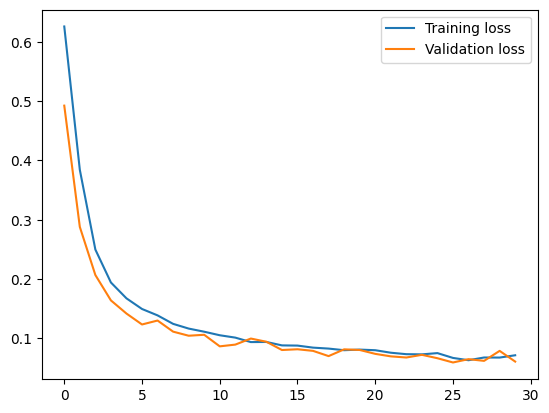

In [33]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Calculating and plotting the average Mean Absolute Error (MAE) for both trainX and testX to determine the threshold for anomaly detection.

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


(array([[1.214e+03, 1.900e+02, 3.490e+02, 4.840e+02, 4.820e+02, 3.530e+02,
         1.640e+02, 9.700e+01, 5.300e+01, 4.300e+01, 2.500e+01, 1.800e+01,
         1.000e+01, 1.700e+01, 1.000e+01, 1.100e+01, 1.100e+01, 1.400e+01,
         6.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.016e+03, 5.740e+02, 2.990e+02, 1.920e+02, 1.460e+02, 9.200e+01,
         5.200e+01, 4.700e+01, 3.600e+01, 2.300e+01, 2.200e+01, 1.500e+01,
         8.000e+00, 8.000e+00, 8.000e+00, 1.000e+01, 3.000e+00, 2.000e+00,
         4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00],
        [1.977e+03, 1.336e+03, 1.280e+02, 6.900e+01, 2.400e+01, 1.200e+01,
         4.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.0

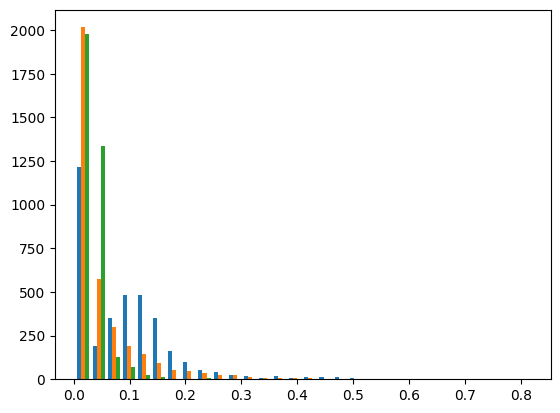

In [34]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)

Checking also the validation dataset to see if there are any difference in the distribution

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


(array([[410.,  44.,  23.,  57.,  55.,  60.,  66.,  57.,  36.,  17.,  16.,
          14.,   3.,   5.,   2.,   4.,   1.,   4.,   1.,   0.,   1.,   3.,
           0.,   2.,   2.,   4.,   2.,   2.,   0.,   0.],
        [345., 288.,  62.,  47.,  19.,  23.,  16.,  13.,   5.,  11.,  12.,
           5.,   0.,   3.,   3.,   9.,   2.,   6.,   3.,   2.,   5.,   1.,
           1.,   0.,   1.,   2.,   1.,   1.,   2.,   3.],
        [296., 404., 114.,  19.,   5.,   8.,   8.,  11.,   7.,   3.,   5.,
           5.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.00380913, 0.02409742, 0.04438571, 0.064674  , 0.08496229,
        0.10525058, 0.12553887, 0.14582716, 0.16611545, 0.18640374,
        0.20669203, 0.22698033, 0.24726862, 0.26755691, 0.2878452 ,
        0.30813349, 0.32842178, 0.34871007, 0.36899836, 0.38928665,
        0.40957494, 0.42986323, 0.45015153, 0.47043982, 0.49072811,
        0.5110164 , 0.53130469, 0.

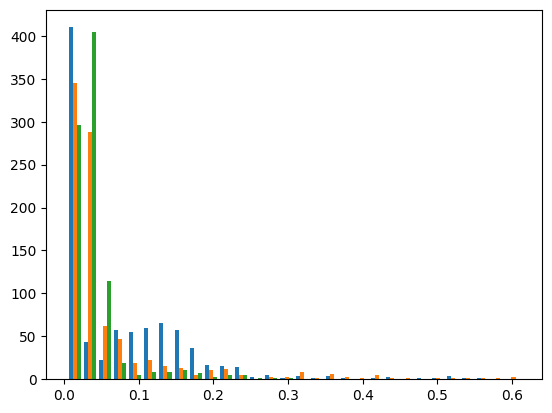

In [35]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)

Then we check the anomaly.

In [36]:
predictions = model.predict(X)
reconstruction_error = np.mean(np.abs(predictions - X), axis=(1, 2))

# Set threshold
threshold = np.percentile(reconstruction_error, 99)

anomalies = reconstruction_error > threshold

anomalous_indices = []
for i, is_anomaly in enumerate(anomalies):
    if is_anomaly:
        anomalous_indices.extend(range(i, i + seq_size))

anomalous_sequences = data.iloc[anomalous_indices]

anomalous_sequences[['usage', 'hour', 'day_of_week']]

print(f'Anomalous sequences (original usage, hour, day_of_week):\n{anomalous_sequences}')

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Anomalous sequences (original usage, hour, day_of_week):
                         usage  hour  day_of_week
timestamp                                        
2024-02-22 10:00:00  25.924267    10            3
2024-02-22 11:00:00  20.466000    11            3
2024-02-22 12:00:00  15.493500    12            3
2024-02-22 13:00:00  18.718833    13            3
2024-02-22 14:00:00  16.543600    14            3
...                        ...   ...          ...
2024-08-26 21:00:00   0.202600    21            0
2024-08-26 22:00:00   0.217000    22            0
2024-08-26 23:00:00   0.246600    23            0
2024-08-27 00:00:00   0.202200     0            1
2024-08-27 01:00:00   0.232400     1            1

[1080 rows x 3 columns]


There are errors caused by missing data values, so improving the preprocessing steps is necessary to address this issue.

### Checking

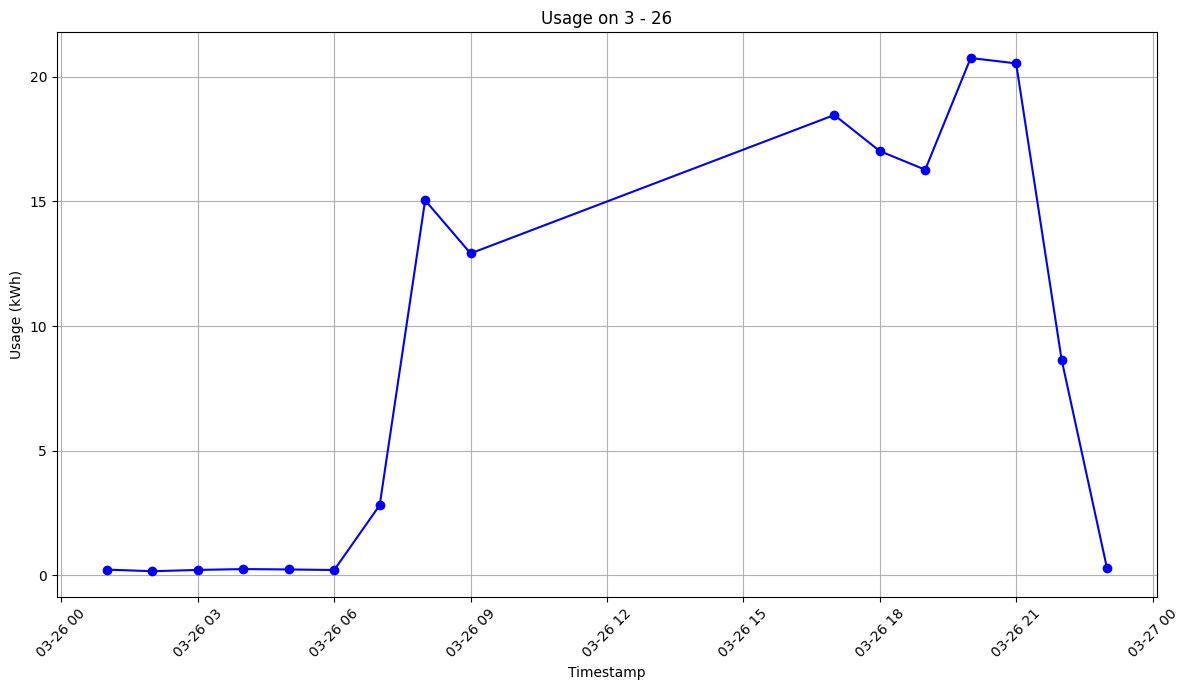

In [37]:
day = 26
month = 3
january_data = df_hourly[(df_hourly.index.month == month) & (df_hourly.index.day == day)]

plt.figure(figsize=(12, 7))
plt.plot(january_data.index, january_data['usage'], marker='o', linestyle='-', color='b')
plt.title(f'Usage on {month} - {day}')
plt.xlabel('Timestamp')
plt.ylabel('Usage (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Alternative Solution
using isolation forest

In [38]:
from sklearn.ensemble import IsolationForest

In [39]:
model = IsolationForest(n_estimators=1000, contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(data[['usage', 'hour', 'day_of_week']])

In [40]:
anomalies = data[data['anomaly'] == -1]

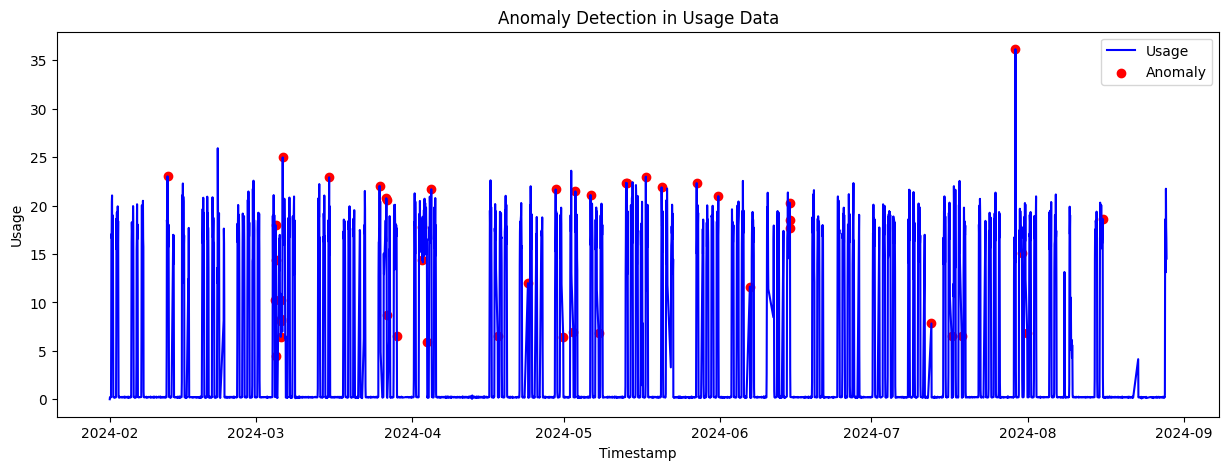

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(df_hourly.index, df_hourly['usage'], color='blue', label='Usage')
plt.scatter(anomalies.index, anomalies['usage'], color='red', label='Anomaly', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Usage')
plt.title('Anomaly Detection in Usage Data')
plt.legend()
plt.show()

In [42]:
for index, row in anomalies.iterrows():
    print(f"Anomaly detected on {index}:")
    print(f"  - Usage Value: {row['usage']}")
    print("-" * 40)

Anomaly detected on 2024-02-12 11:00:00:
  - Usage Value: 23.02733333333209
----------------------------------------
Anomaly detected on 2024-03-04 20:00:00:
  - Usage Value: 10.280866666667164
----------------------------------------
Anomaly detected on 2024-03-04 21:00:00:
  - Usage Value: 17.97433333333209
----------------------------------------
Anomaly detected on 2024-03-04 22:00:00:
  - Usage Value: 14.408
----------------------------------------
Anomaly detected on 2024-03-04 23:00:00:
  - Usage Value: 4.49939999999851
----------------------------------------
Anomaly detected on 2024-03-05 21:00:00:
  - Usage Value: 10.291066666666419
----------------------------------------
Anomaly detected on 2024-03-05 22:00:00:
  - Usage Value: 6.4425
----------------------------------------
Anomaly detected on 2024-03-05 23:00:00:
  - Usage Value: 8.103633333332837
----------------------------------------
Anomaly detected on 2024-03-06 00:00:00:
  - Usage Value: 8.246199999999256
---------

This solution focuses more on detecting energy overusage rather than anomalies caused by lower usage.

## Conclusion
If no better solution is identified for addressing the preprocessing issues, leveraging the Isolation Forest algorithm would be a more suitable approach. Isolation Forest inherently handles the challenges associated with missing or noisy data better than autoencoders or other methods that rely heavily on clean, well-structured datasets. 